In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
df = pd.read_csv('predictive_maintenance.csv')

df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [20]:
# Cleaning the dataset
df.info()
df.describe()
df.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False


In [21]:
value = 'M14860'
numeric_part = value.replace('M', '')  # Remove the 'M'
number = float(numeric_part)

In [22]:
try:
    number = float(numeric_part)
except ValueError:
    print(f"Cannot convert {value} to float.")

AttributeError: Rectangle.set() got an unexpected keyword argument 'X'

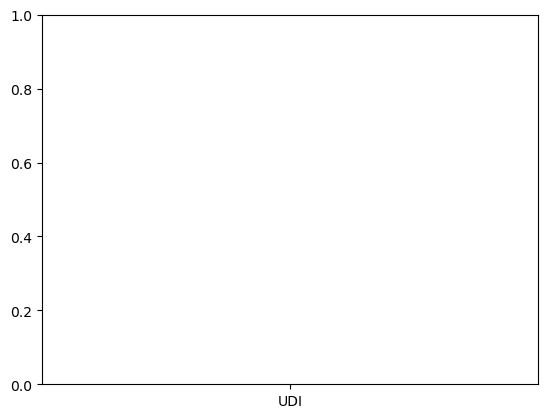

In [23]:
#Exploratory Data Analysis
#Target distribution(failure)
sns.countplot(X='Failure', data=df)
plt.title("Distribution of failures")
plt.show()

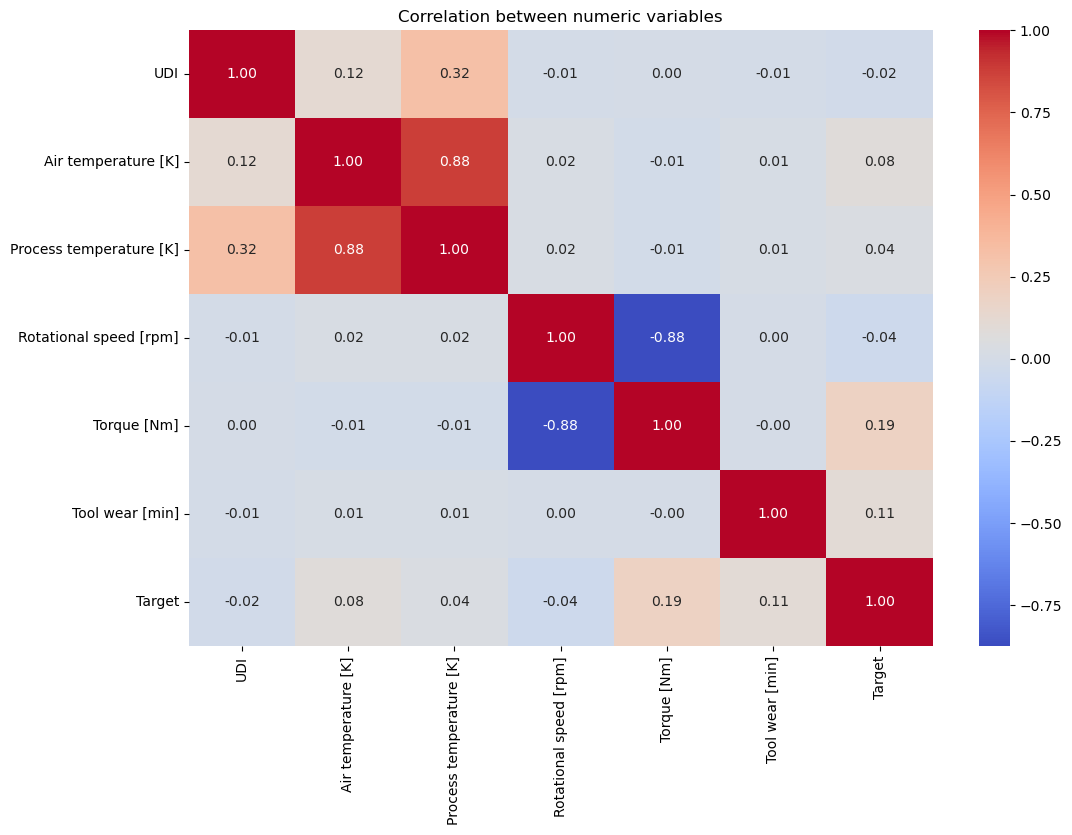

In [27]:
#matrix of correlation relationship between and sensors

import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=ax)
ax.set_title("Correlation between numeric variables")
plt.show()

In [32]:
# Drop non-numeric columns or encode them
x = df.drop(columns=['Failure Type', 'Product ID', 'Type', 'Target'], errors='ignore')

# If you want to include categorical variables, encode them:
# x = pd.get_dummies(df[['Product ID', 'Type']], drop_first=True)

# Set target variable
y = df['Failure Type']

In [34]:
# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

In [35]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
# Prédiction
y_pred = model.predict(X_test)

In [37]:
print(y_pred)

['No Failure' 'No Failure' 'No Failure' ... 'No Failure' 'No Failure'
 'No Failure']


In [38]:
print("\nClassification Report :")
print(classification_report(y_test, y_pred))



Classification Report :
                          precision    recall  f1-score   support

Heat Dissipation Failure       0.91      0.91      0.91        22
              No Failure       0.99      1.00      0.99      1930
      Overstrain Failure       0.73      0.50      0.59        16
           Power Failure       0.80      0.63      0.71        19
         Random Failures       0.00      0.00      0.00         4
       Tool Wear Failure       0.00      0.00      0.00         9

                accuracy                           0.98      2000
               macro avg       0.57      0.51      0.53      2000
            weighted avg       0.97      0.98      0.98      2000



C:\Users\xxx\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\xxx\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\xxx\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


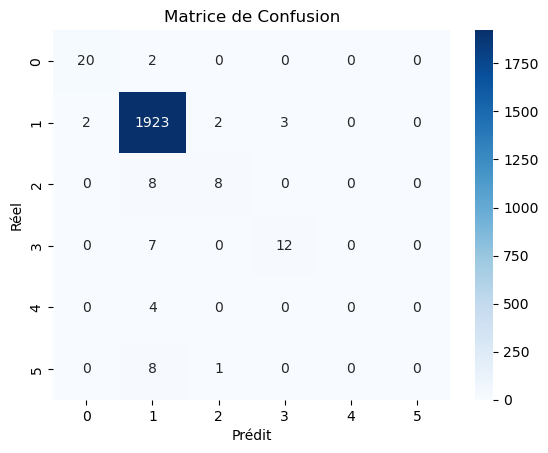

In [39]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de Confusion")
plt.show()

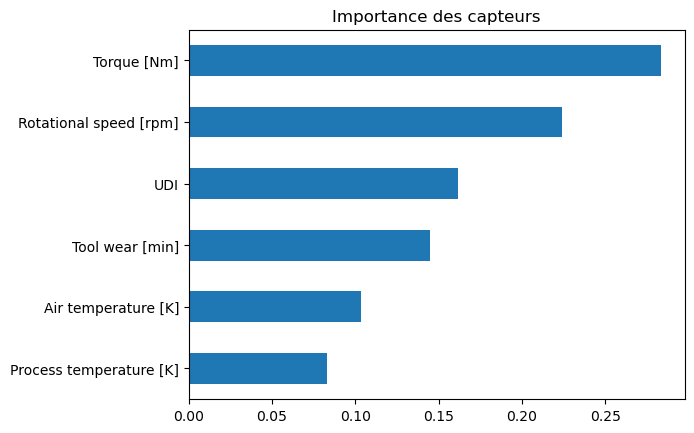

In [42]:
importances = model.feature_importances_
feat_importance = pd.Series(importances, index=x.columns)
feat_importance.sort_values().plot(kind='barh', title='Importance des capteurs')
plt.show()

In [43]:
if 'Product ID' in df.columns:
    failure_per_machine = df.groupby('Product ID')['Failure Type'].sum()
    print("\nsum of failures per machine :")
    print(failure_per_machine)
    failure_per_machine.plot(kind='bar', title="Failure per Machine")
    plt.show()


sum of failures per machine :
Product ID
H29424    No Failure
H29425    No Failure
H29432    No Failure
H29434    No Failure
H29441    No Failure
             ...    
M24849    No Failure
M24851    No Failure
M24855    No Failure
M24857    No Failure
M24859    No Failure
Name: Failure Type, Length: 10000, dtype: object


TypeError: no numeric data to plot